In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('Set2')
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
df = pd.read_csv('mental_health_tech.csv')
df.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,Jun-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,Jun-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,Jun-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [20]:
def drop_missing_columns(df):
   
    missing_values_percentage = df.isnull().mean()
    df = df.drop(columns=missing_values_percentage[missing_values_percentage > 0.5].index)
    
    return df

In [21]:
df = drop_missing_columns(df)

df.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,No,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,Jun-25,1.0,No,Yes,Yes,Yes,Yes,Somewhat easy,No,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,Jun-25,1.0,No,NaN,No,No,I don't know,Neither easy nor difficult,Maybe,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,Jun-25,0.0,Yes,Yes,No,No,No,Neither easy nor difficult,Yes,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [22]:
extra_feature=['What US state or territory do you work in?','Why or why not?','Why or why not?.1',
               'What US state or territory do you live in?','Which of the following best describes your work position?',
               'What country do you live in?','Are you self-employed?','Do you have previous employers?']
df.drop([i for i in extra_feature],axis=1,inplace=True)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 42 columns):
 #   Column                                                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                                                          --------------  -----  
 0   How many employees does your company or organization have?                                                                                      1146 non-null   object 
 1   Is your employer primarily a tech company/organization?                                                                                         1146 non-null   float64
 2   Does your employer provide mental health benefits as part of healthcare coverage?                                                               1146 non-null   object 
 3   Do you know the options

In [25]:
real_features=(list(df))
print(real_features)


['How many employees does your company or organization have?', 'Is your employer primarily a tech company/organization?', 'Does your employer provide mental health benefits as part of healthcare coverage?', 'Do you know the options for mental health care available under your employer-provided coverage?', 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?', 'Does your employer offer resources to learn more about mental health concerns and options for seeking help?', 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?', 'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:', 'Do you think that discussing a mental health disorder with your employer would have negative consequences?', 'Do you think that discussing a physical health issue with your employer would

In [26]:
# REMOVING SELF EMPLOYED 287 NAN
count=0
for index,col in enumerate(real_features):
    idx=df.index[df[col].isnull()]

    #response.drop(idx,inplace=True)
    if(len(idx)==287):
        #print(index,idx)
        k=idx
        count+=1
# print(k)
#print(count)    12
#print(k)
#idx=response.index[response['Does your employer offer resources to learn more about mental health concerns and options for seeking help?'].isnull()]
df.drop(k,inplace=True)
df.shape


(1146, 42)

In [27]:
count=0
for index,col in enumerate(real_features):
    idx=df.index[df[col].isnull()]
    #response.drop(idx,inplace=True)
    if(len(idx)==131):
        #print(index,idx)
        k=idx
        count+=1
# print(count) 11
# print(k)
#idx=response.index[response['Does your employer offer resources to learn more about mental health concerns and options for seeking help?'].isnull()]
df.drop(k,inplace=True)
df.shape


(1015, 42)

In [30]:
# clean the genders by grouping the genders into 3 categories: Female, Male, Genderqueer/Other
df['What is your gender?'] = df['What is your gender?'].replace([
    'male', 'Male ', 'M', 'm', 'man', 'Cis male',
    'Male.', 'Male (cis)', 'Man', 'Sex is male',
    'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
    'mail', 'M|', 'male ', 'Cis Male', 'Male (trans, FtM)',
    'cisdude', 'cis man', 'MALE'], 'Male')
df['What is your gender?'] = df['What is your gender?'].replace([
    'female', 'I identify as female.', 'female ',
    'Female assigned at birth ', 'F', 'Woman', 'fm', 'f',
    'Cis female', 'Transitioned, M2F', 'Female or Multi-Gender Femme',
    'Female ', 'woman', 'female/woman', 'Cisgender Female', 
    'mtf', 'fem', 'Female (props for making this a freeform field, though)',
    ' Female', 'Cis-woman', 'AFAB', 'Transgender woman',
    'Cis female '], 'Female')
df['What is your gender?'] = df['What is your gender?'].replace([
    'Bigender', 'non-binary,', 'Genderfluid (born female)',
    'Other/Transfeminine', 'Androgynous', 'male 9:1 female, roughly',
    'nb masculine', 'genderqueer', 'Human', 'Genderfluid',
    'Enby', 'genderqueer woman', 'Queer', 'Agender', 'Fluid',
    'Genderflux demi-girl', 'female-bodied; no feelings about gender',
    'non-binary', 'Male/genderqueer', 'Nonbinary', 'Other', 'none of your business',
    'Unicorn', 'human', 'Genderqueer'], 'Genderqueer/Other')


In [29]:
# clean the ages by replacing the weird ages with the mean age
# min age was 3 and max was 393 
df.loc[(df['What is your age?'] > 90), 'What is your age?'] = 34
df.loc[(df['What is your age?'] < 10), 'What is your age?'] = 34
# replace the one null with Male, the mode gender, so we don't have to drop the row
df['What is your gender?'] = df['What is your gender?'].replace(np.NaN, 'Male')
df['What is your gender?'].value_counts()

Male                 749
Female               245
Genderqueer/Other     21
Name: What is your gender?, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1015 entries, 0 to 1431
Data columns (total 42 columns):
 #   Column                                                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                                                          --------------  -----  
 0   How many employees does your company or organization have?                                                                                      1015 non-null   object 
 1   Is your employer primarily a tech company/organization?                                                                                         1015 non-null   float64
 2   Does your employer provide mental health benefits as part of healthcare coverage?                                                               1015 non-null   object 
 3   Do you know the options

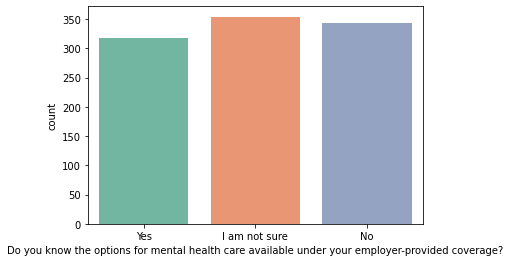

In [32]:
df.fillna(method='ffill',inplace=True)
df.fillna(value='Yes', limit=1,inplace=True)
#print df['Do you know the options for mental health care available under your employer-provided coverage?']
g = sns.countplot(x='Do you know the options for mental health care available under your employer-provided coverage?',data=df)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1015 entries, 0 to 1431
Data columns (total 42 columns):
 #   Column                                                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                                                          --------------  -----  
 0   How many employees does your company or organization have?                                                                                      1015 non-null   object 
 1   Is your employer primarily a tech company/organization?                                                                                         1015 non-null   float64
 2   Does your employer provide mental health benefits as part of healthcare coverage?                                                               1015 non-null   object 
 3   Do you know the options

In [35]:
for index,val in enumerate(real_features):
    p=df[val].unique()
    print(index,val)
    print(p)
    print('\n')
    #print(response[val].isnull().sum())
    #print("\n")

0 How many employees does your company or organization have?
['26-100' 'Jun-25' 'More than 1000' '100-500' '500-1000' '01-May']


1 Is your employer primarily a tech company/organization?
[1. 0.]


2 Does your employer provide mental health benefits as part of healthcare coverage?
['Not eligible for coverage / N/A' 'No' 'Yes' "I don't know"]


3 Do you know the options for mental health care available under your employer-provided coverage?
['Yes' 'I am not sure' 'No']


4 Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
['No' 'Yes' "I don't know"]


5 Does your employer offer resources to learn more about mental health concerns and options for seeking help?
['No' 'Yes' "I don't know"]


6 Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
["I don't know" 'Yes' 'No']


7 If a mental health issue prompted you to 

In [36]:
country=(df[real_features[40]].unique())
num_rep=[]    #numeric representation with there index
alp_rep=[]    # name of country
#print(type(country))
for index,val in enumerate(country):
    num_rep.append(index)
    alp_rep.append(val)
print(len(num_rep),len(alp_rep))
df[real_features[40]].replace(alp_rep, num_rep,inplace=True)  # Replacing country name with the index

42 42


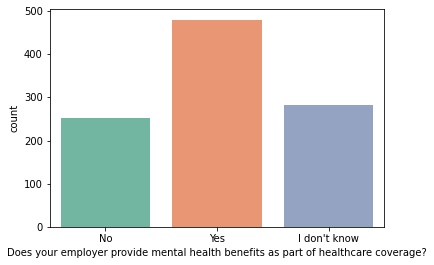

In [37]:
df['Does your employer provide mental health benefits as part of healthcare coverage?'] = df['Does your employer provide mental health benefits as part of healthcare coverage?'].replace('Not eligible for coverage / N/A','No')
g = sns.countplot(x='Does your employer provide mental health benefits as part of healthcare coverage?',data=df)

In [38]:
df['How many employees does your company or organization have?'] = df['How many employees does your company or organization have?'].replace('1-5', 5)
df['How many employees does your company or organization have?'] = df['How many employees does your company or organization have?'].replace('6-25',25)
df['How many employees does your company or organization have?'] = df['How many employees does your company or organization have?'].replace('26-100', 100)
df['How many employees does your company or organization have?'] = df['How many employees does your company or organization have?'].replace('100-500',500)
df['How many employees does your company or organization have?'] = df['How many employees does your company or organization have?'].replace('500-1000',1000)
df['How many employees does your company or organization have?'] = df['How many employees does your company or organization have?'].replace('More than 1000',5000)
df['How many employees does your company or organization have?'] = df['How many employees does your company or organization have?'].replace(np.nan,5)

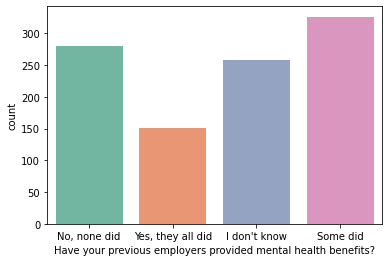

In [40]:
g = sns.countplot(x=df[real_features[14]],data=df)

In [41]:
numeric = {real_features[2]:     {'No':0, 'Yes':1, "I don't know":2},
                real_features[3]: {'Yes':1, 'I am not sure':2, 'No':0},
                 real_features[4]:{'No':0, 'Yes':1, "I don't know":2},
                  real_features[5]:{'No':0, 'Yes':1, "I don't know":2},
                   real_features[6]:{"I don't know":2, 'Yes':1, 'No':0},
                    real_features[7]:{'Very easy':0 ,'Somewhat easy':1, 'Neither easy nor difficult':2,'Very difficult':-1,
 'Somewhat difficult':-2, "I don't know":2}, #### MODIFIED DIRECTLY
                real_features[8]:{'No':0, 'Maybe':2, 'Yes':1},
                real_features[9]:{'No':0, 'Maybe':2, 'Yes':1},
                 real_features[10]:{'No':0, 'Maybe':2, 'Yes':1},
                 real_features[11]:{'No':0, 'Maybe':2, 'Yes':1},
                 real_features[12]:{"I don't know":2, 'Yes':1, 'No':0},
                 real_features[13]:{'No':0, 'Yes':1},
                 real_features[14]:{'No, none did':0, 'Yes, they all did':1, "I don't know":2, 'Some did':3},
                 real_features[15]:{'N/A (not currently aware)':0, 'I was aware of some':1,
 'Yes, I was aware of all of them':1, 'No, I only became aware later':0},  ### MODIFIED DIRECTLY
                real_features[16]:{"I don't know":2, 'None did':0, 'Some did':3,'Yes, they all did':1},
                real_features[17]:{'None did':0, 'Some did':3, 'Yes, they all did':1},
                real_features[18]:{"I don't know":2, 'Yes, always':1, 'Sometimes':3, 'No':0},
                real_features[19]:{'Some of them':3, 'None of them':0, "I don't know":2, 'Yes, all of them':1},
                real_features[20]:{'None of them':0, 'Some of them':3, 'Yes, all of them':1},
                real_features[21]:{'Some of my previous employers':3, 'No, at none of my previous employers':0,
 'Yes, at all of my previous employers':1},
                real_features[22]:{'Some of my previous employers':3, "I don't know":2, 'No, at none of my previous employers':0,
 'Yes, at all of my previous employers':1},
                real_features[23]:{"I don't know":2, 'Some did':3, 'None did':0, 'Yes, they all did':1},
                real_features[24]:{'None of them':0, 'Some of them':3, 'Yes, all of them':1},
                real_features[25]:{'Maybe':2, 'Yes':1, 'No':0},
                real_features[26]:{'Maybe':2, 'Yes':1, 'No':0},
                real_features[27]:{'Maybe':2, "No, I don't think it would":0, 'Yes, I think it would':1,
 'No, it has not':0, 'Yes, it has':1},  ### MODIFIED DIRECTLY
                real_features[28]:{"No, I don't think they would":0, 'Maybe':2, 'Yes, they do':1,'Yes, I think they would':1, 'No, they do not':0},  ## MODIFIED DIRECTLY
                real_features[29]:{'Somewhat open':1, 'Not applicable to me (I do not have a mental illness)':4,
 'Very open':2, 'Not open at all':-2 ,'Neutral':0, 'Somewhat not open':-1}, ### MODIFIED DIRECTLY
                real_features[30]:{'No':0, 'Maybe/Not sure':2, 'Yes, I experienced':1, 'Yes, I observed':1},
                real_features[31]:{'No':0, 'Yes':1, "I don't know":2},
                real_features[32]:{'Yes':1, 'Maybe':2, 'No':0},
                real_features[33]:{'Yes':1, 'Maybe':2, 'No':0},
                real_features[34]:{'Yes':1, 'No':0},
                real_features[36]:{'Not applicable to me':4, 'Rarely':0, 'Sometimes':3, 'Never':0, 'Often':1},
                real_features[37]:{'Not applicable to me':4, 'Sometimes':3, 'Often':1, 'Rarely':0, 'Never':0},
                real_features[39]:{'Male':1, 'Female':0, 'Genderqueer/Other':2},
                real_features[41]:{'Sometimes':3, 'Never':0, 'Always':1}
          }
df.replace(numeric, inplace=True)
df.head()


,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,...,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,Have you been diagnosed with a mental health condition by a medical professional?,Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you work in?,Do you work remotely?
0,100,1.0,0,1,0,0,2,0,0,0,...,1,0,1,0,4,4,39,1,0,3
1,Jun-25,1.0,0,1,1,1,1,1,0,0,...,1,1,1,1,0,3,29,1,1,0
2,Jun-25,1.0,0,1,0,0,2,2,2,0,...,2,0,0,1,4,4,38,1,0,1
4,Jun-25,0.0,1,1,0,0,0,2,1,2,...,1,1,1,1,3,3,43,0,1,3
5,5000,1.0,1,2,0,1,1,1,1,1,...,0,1,0,1,4,1,42,1,0,3


In [42]:
df['How many employees does your company or organization have?'].unique()

array([100, 'Jun-25', 5000, 500, 1000, '01-May'], dtype=object)

In [43]:
df['How many employees does your company or organization have?'].replace(['Jun-25','01-May'], [200,150], inplace=True)

In [44]:
df['How many employees does your company or organization have?'].unique()

array([ 100,  200, 5000,  500, 1000,  150], dtype=int64)

In [45]:
if df.astype(str).eq(df).all().all():
    print("All values in the DataFrame are strings.")
else:
    print("There are non-string values in the DataFrame.")

There are non-string values in the DataFrame.


In [46]:
real_features=(list(df))
print(real_features)


['How many employees does your company or organization have?', 'Is your employer primarily a tech company/organization?', 'Does your employer provide mental health benefits as part of healthcare coverage?', 'Do you know the options for mental health care available under your employer-provided coverage?', 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?', 'Does your employer offer resources to learn more about mental health concerns and options for seeking help?', 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?', 'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:', 'Do you think that discussing a mental health disorder with your employer would have negative consequences?', 'Do you think that discussing a physical health issue with your employer would

In [47]:
df.head()

,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,...,Have you had a mental health disorder in the past?,Do you currently have a mental health disorder?,Have you been diagnosed with a mental health condition by a medical professional?,Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you work in?,Do you work remotely?
0,100,1.0,0,1,0,0,2,0,0,0,...,1,0,1,0,4,4,39,1,0,3
1,200,1.0,0,1,1,1,1,1,0,0,...,1,1,1,1,0,3,29,1,1,0
2,200,1.0,0,1,0,0,2,2,2,0,...,2,0,0,1,4,4,38,1,0,1
4,200,0.0,1,1,0,0,0,2,1,2,...,1,1,1,1,3,3,43,0,1,3
5,5000,1.0,1,2,0,1,1,1,1,1,...,0,1,0,1,4,1,42,1,0,3


In [ ]:

['How many employees does your company or organization have?', 'Is your employer primarily a tech company/organization?',
  'Does your employer provide mental health benefits as part of healthcare coverage?', 
  'Do you know the options for mental health care available under your employer-provided coverage?', 
  'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?', 
  'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
    'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?', 
    'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:', 
    'Do you think that discussing a mental health disorder with your employer would have negative consequences?', 
    'Do you think that discussing a physical health issue with your employer would have negative consequences?', 
    'Would you feel comfortable discussing a mental health disorder with your coworkers?', 
    'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?', 
    'Do you feel that your employer takes mental health as seriously as physical health?',
      'Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?',
        'Have your previous employers provided mental health benefits?', 'Were you aware of the options for mental health care provided by your previous employers?',
          'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?',
            'Did your previous employers provide resources to learn more about mental health issues and how to seek help?', 
            'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?',
              'Do you think that discussing a mental health disorder with previous employers would have negative consequences?', 
              'Do you think that discussing a physical health issue with previous employers would have negative consequences?',
                'Would you have been willing to discuss a mental health issue with your previous co-workers?', 
                'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?',
                  'Did you feel that your previous employers took mental health as seriously as physical health?', 
                  'Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?', 
                  'Would you be willing to bring up a physical health issue with a potential employer in an interview?', 
                  'Would you bring up a mental health issue with a potential employer in an interview?', 
                  'Do you feel that being identified as a person with a mental health issue would hurt your career?', 
                  'Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?', 
                  'How willing would you be to share with friends and family that you have a mental illness?', 
                  'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?',
                    'Do you have a family history of mental illness?', 'Have you had a mental health disorder in the past?', 
                    'Do you currently have a mental health disorder?', 'Have you been diagnosed with a mental health condition by a medical professional?',
                      'Have you ever sought treatment for a mental health issue from a mental health professional?', 
                      'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?', 
                      'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?', 
                      'What is your age?', 'What is your gender?', 'What country do you work in?', 'Do you work remotely?']

In [48]:
short_names = ['num_employees', 'tech_company', 'mh_benefits', 'mh_options', 'formal_discussion', 'mh_resources', 'anonymity_protected', 'mh_leave', 'mh_discuss_negative', 'ph_discuss_negative', 'mh_coworkers_comfort', 'mh_supervisors_comfort', 'employer_mh_ph_equal', 'coworkers_mh_neg_consequences', 'prev_mh_benefits', 'prev_mh_options', 'prev_formal_discussion', 'prev_mh_resources', 'prev_anonymity_protected', 'prev_mh_discuss_negative', 'prev_ph_discuss_negative', 'prev_mh_coworkers_willing', 'prev_mh_supervisors_willing', 'prev_employer_mh_ph_equal', 'prev_coworkers_mh_neg_consequences', 'interview_ph_issue', 'interview_mh_issue', 'mh_identified_hurt_career', 'team_view_negative', 'share_friends_family', 'unsupportive_response', 'family_history', 'past_mh_disorder', 'current_mh_disorder', 'diagnosed_mh_condition', 'sought_treatment', 'treated_interferes_work', 'untreated_interferes_work', 'age', 'gender', 'country', 'remote_work']


df.columns = short_names
df.head()

,num_employees,tech_company,mh_benefits,mh_options,formal_discussion,mh_resources,anonymity_protected,mh_leave,mh_discuss_negative,ph_discuss_negative,...,past_mh_disorder,current_mh_disorder,diagnosed_mh_condition,sought_treatment,treated_interferes_work,untreated_interferes_work,age,gender,country,remote_work
0,100,1.0,0,1,0,0,2,0,0,0,...,1,0,1,0,4,4,39,1,0,3
1,200,1.0,0,1,1,1,1,1,0,0,...,1,1,1,1,0,3,29,1,1,0
2,200,1.0,0,1,0,0,2,2,2,0,...,2,0,0,1,4,4,38,1,0,1
4,200,0.0,1,1,0,0,0,2,1,2,...,1,1,1,1,3,3,43,0,1,3
5,5000,1.0,1,2,0,1,1,1,1,1,...,0,1,0,1,4,1,42,1,0,3


In [51]:
df.to_csv('mental_health_clean_data.csv')

In [52]:
df.describe()

,num_employees,tech_company,mh_benefits,mh_options,formal_discussion,mh_resources,anonymity_protected,mh_leave,mh_discuss_negative,ph_discuss_negative,...,past_mh_disorder,current_mh_disorder,diagnosed_mh_condition,sought_treatment,treated_interferes_work,untreated_interferes_work,age,gender,country,remote_work
count,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,...,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000
mean,1327.635468,0.776355,1.030542,1.009852,0.389163,0.829557,1.585222,0.379310,1.026601,0.492611,...,0.852217,0.851232,0.507389,0.589163,2.348768,2.442365,33.819704,0.779310,3.115271,1.811823
std,1936.380223,0.416892,0.725727,0.829618,0.652170,0.842365,0.610863,1.443535,0.901610,0.841300,...,0.674875,0.761847,0.500192,0.492228,1.733911,1.386885,7.458102,0.462142,6.378396,1.319352
min,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000
25%,100.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,29.000000,1.000000,1.000000,0.000000
50%,500.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,33.000000,1.000000,1.000000,3.000000
75%,1000.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,38.000000,1.000000,2.000000,3.000000
max,5000.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,1.000000,1.000000,4.000000,4.000000,74.000000,2.000000,41.000000,3.000000


In [121]:
df2 = df

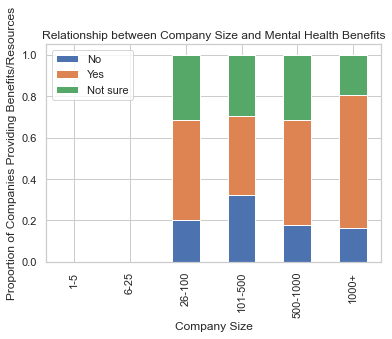

In [122]:
bins = [0, 5, 25, 100, 500, 1000, float('inf')]
labels = ['1-5', '6-25', '26-100', '101-500', '500-1000', '1000+']

# Create a new column with company size categories
df2['company_size'] = pd.cut(df2['num_employees'], bins=bins, labels=labels)

# Group the data by company size and calculate the count of companies providing mental health benefits/resources
grouped_data = df2.groupby('company_size').agg({
    'mh_benefits': lambda x: x.value_counts(normalize=True).to_dict(),
    'mh_resources': 'sum',
})

# Separate the mh_benefits column into three columns (No, Yes, Not sure)
grouped_data = pd.concat([grouped_data.drop('mh_benefits', axis=1), grouped_data['mh_benefits'].apply(pd.Series)], axis=1)
grouped_data.rename(columns={0: 'No', 1: 'Yes', 2: 'Not sure'}, inplace=True)

# Normalize the data to get proportions for mh_resources
grouped_data['mh_resources'] = grouped_data['mh_resources'] / grouped_data['mh_resources'].sum()

# Create a bar plot
grouped_data[['No', 'Yes', 'Not sure']].plot(kind='bar', stacked=True)

plt.xlabel('Company Size')
plt.ylabel('Proportion of Companies Providing Benefits/Resources')
plt.title('Relationship between Company Size and Mental Health Benefits')
plt.legend(['No', 'Yes', 'Not sure'])
plt.show()

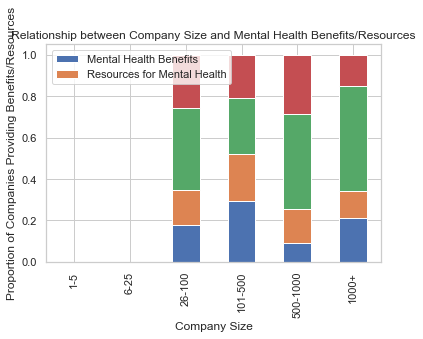

Chi-square value: nan, p-value: nan
nan
no


In [125]:
from scipy.stats import chi2_contingency
grouped_data_proportions = grouped_data.apply(lambda x: x / x.sum(), axis=1)

# Create a bar plot
grouped_data_proportions.plot(kind='bar', stacked=True)

plt.xlabel('Company Size')
plt.ylabel('Proportion of Companies Providing Benefits/Resources')
plt.title('Relationship between Company Size and Mental Health Benefits/Resources')
plt.legend(['Mental Health Benefits', 'Resources for Mental Health'])
plt.show()

# Perform hypothesis testing: Chi-square test of independence
chi2, p_value, _, _ = chi2_contingency(grouped_data)
print(f"Chi-square value: {chi2}, p-value: {p_value}")
print(p_value)

if p_value < 0.05:
    print("There is a significant relationship between company size and mental health benefits/resources provided.")
else:
    print('no')

c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

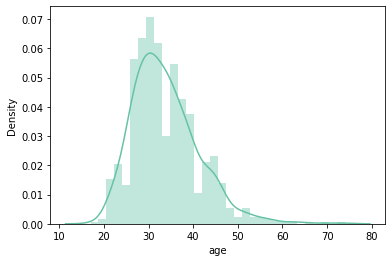

In [54]:
sns.distplot(df['age'])

c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot`

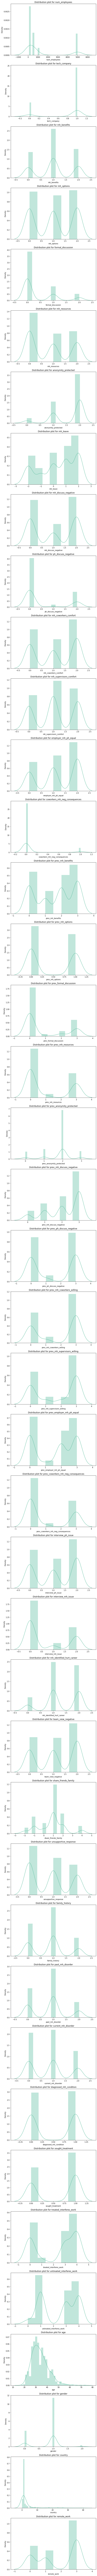

In [55]:
# n_columns = len(df.columns)
# fig, axes = plt.subplots(n_columns, 1, figsize=(8, 5 * n_columns))

# for i, column in enumerate(df.columns):
#     sns.distplot(df[column], ax=axes[i])
#     axes[i].set_title(f"Distribution plot for {column}")

# plt.tight_layout()
# plt.show()

def dist_plot(dataframe):
    n_columns = len(dataframe.columns)
    fig, axes = plt.subplots(n_columns, 1, figsize=(8, 5 * n_columns))

    for i, column in enumerate(dataframe.columns):
        sns.distplot(dataframe[column], ax=axes[i])
        axes[i].set_title(f"Distribution plot for {column}")

    plt.tight_layout()
    plt.show()


dist_plot(df)


In [63]:
def replace_values(dataframe, column):
    new_df = dataframe.copy()
    new_df[column] = new_df[column].apply(lambda x: 0 if x != 1 else x)
    return new_df

In [64]:
df = replace_values(df, 'country')

In [65]:
df.head()

,num_employees,tech_company,mh_benefits,mh_options,formal_discussion,mh_resources,anonymity_protected,mh_leave,mh_discuss_negative,ph_discuss_negative,...,past_mh_disorder,current_mh_disorder,diagnosed_mh_condition,sought_treatment,treated_interferes_work,untreated_interferes_work,age,gender,country,remote_work
0,100,1.0,0,1,0,0,2,0,0,0,...,1,0,1,0,4,4,39,1,0,3
1,200,1.0,0,1,1,1,1,1,0,0,...,1,1,1,1,0,3,29,1,1,0
2,200,1.0,0,1,0,0,2,2,2,0,...,2,0,0,1,4,4,38,1,0,1
4,200,0.0,1,1,0,0,0,2,1,2,...,1,1,1,1,3,3,43,0,1,3
5,5000,1.0,1,2,0,1,1,1,1,1,...,0,1,0,1,4,1,42,1,0,3


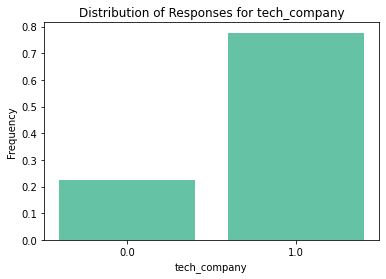

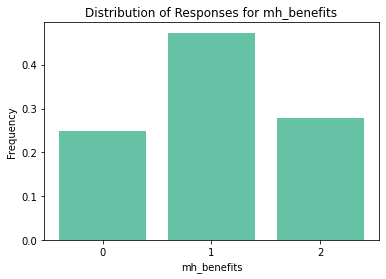

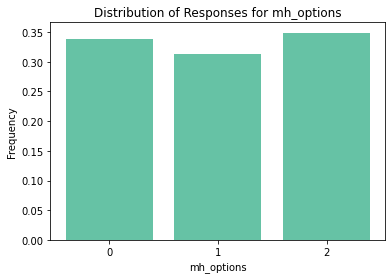

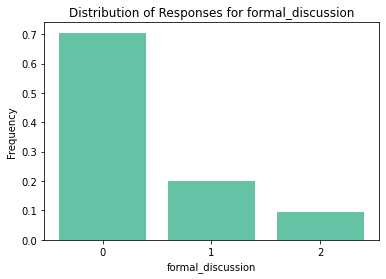

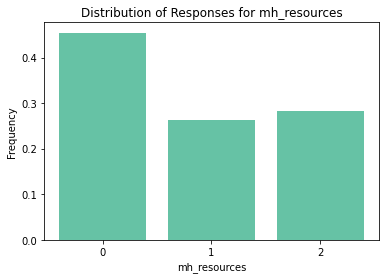

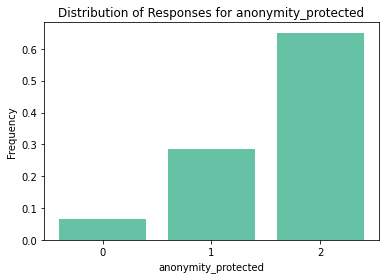

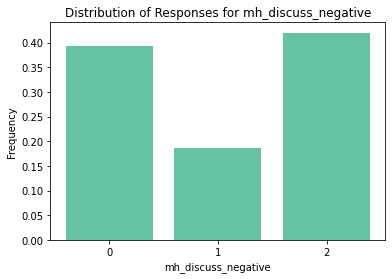

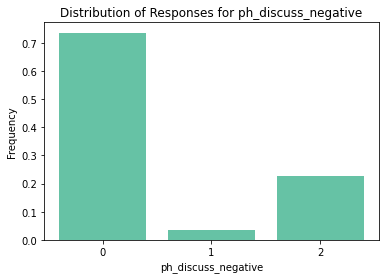

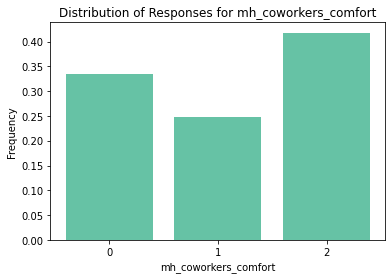

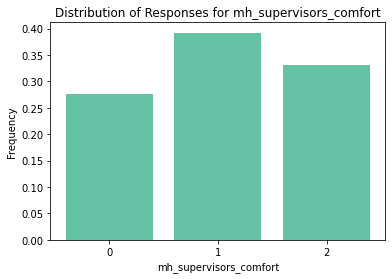

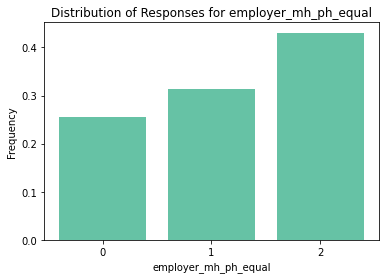

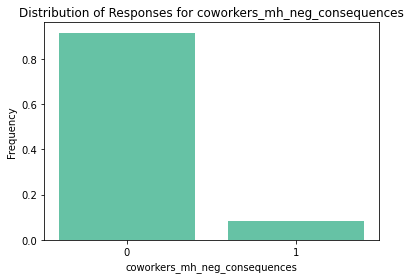

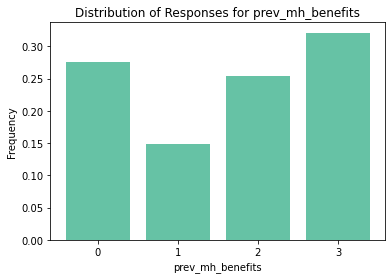

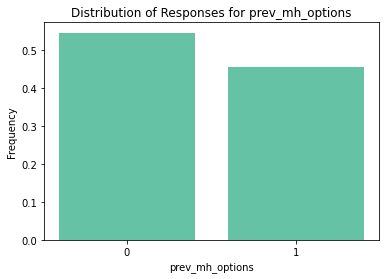

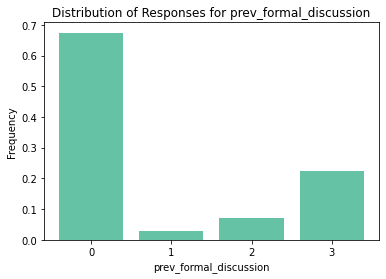

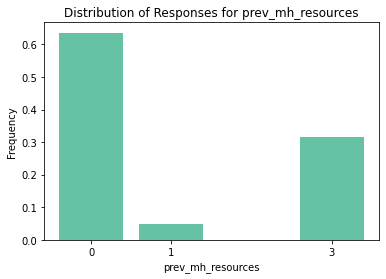

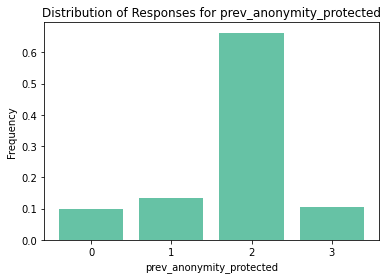

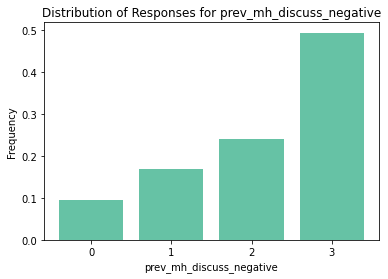

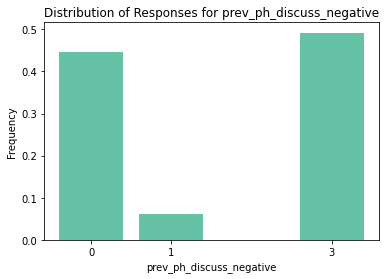

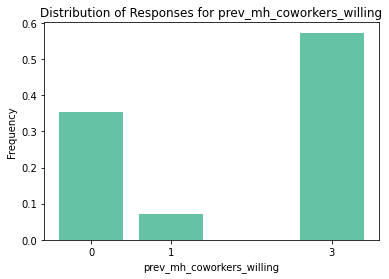

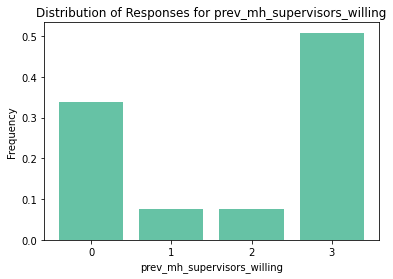

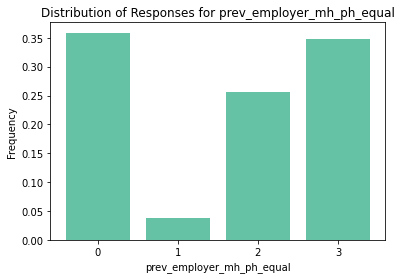

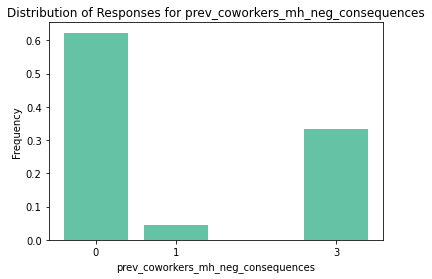

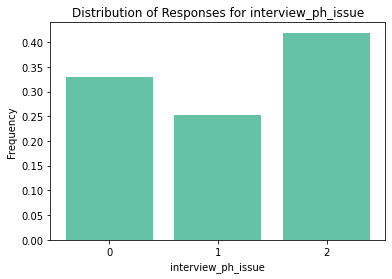

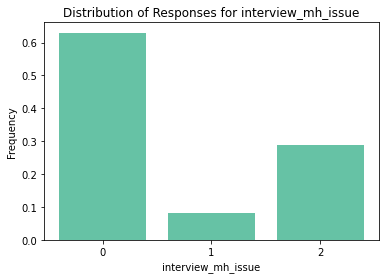

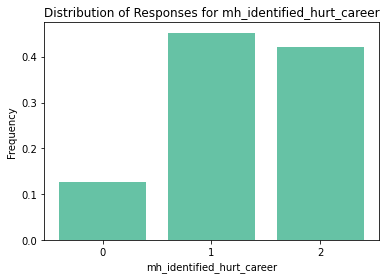

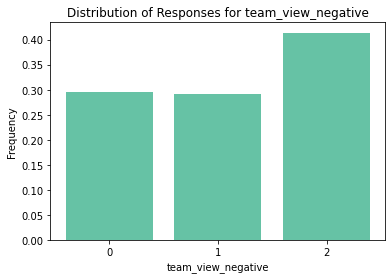

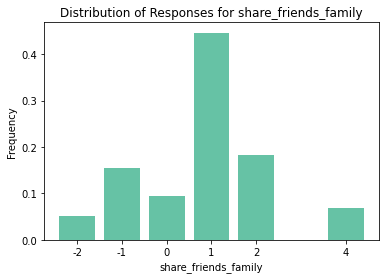

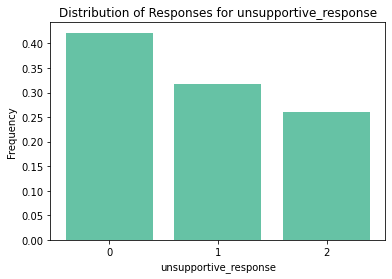

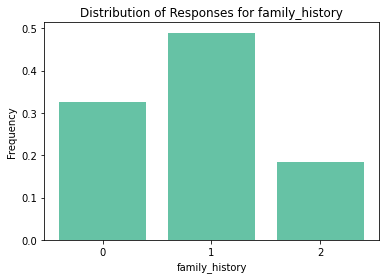

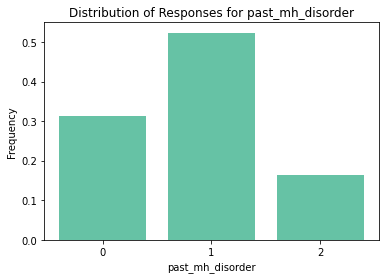

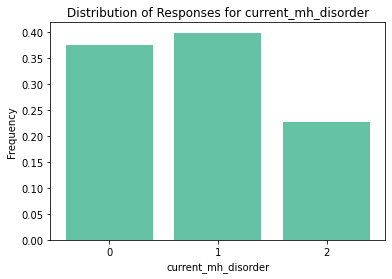

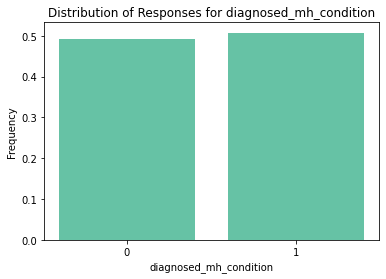

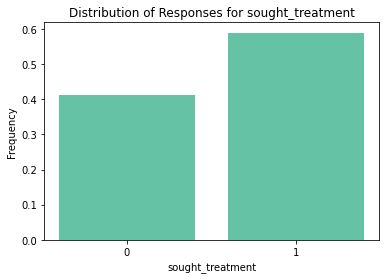

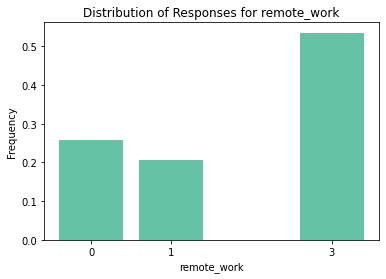

In [75]:

binary_columns = ['tech_company', 'mh_benefits', 'mh_options', 'formal_discussion', 'mh_resources', 'anonymity_protected', 'mh_discuss_negative', 'ph_discuss_negative', 'mh_coworkers_comfort', 'mh_supervisors_comfort', 'employer_mh_ph_equal', 'coworkers_mh_neg_consequences', 'prev_mh_benefits', 'prev_mh_options', 'prev_formal_discussion', 'prev_mh_resources', 'prev_anonymity_protected', 'prev_mh_discuss_negative', 'prev_ph_discuss_negative', 'prev_mh_coworkers_willing', 'prev_mh_supervisors_willing', 'prev_employer_mh_ph_equal', 'prev_coworkers_mh_neg_consequences', 'interview_ph_issue', 'interview_mh_issue', 'mh_identified_hurt_career', 'team_view_negative', 'share_friends_family', 'unsupportive_response', 'family_history', 'past_mh_disorder', 'current_mh_disorder', 'diagnosed_mh_condition', 'sought_treatment', 'remote_work']

for column in binary_columns:
    value_counts = df[column].value_counts(normalize=True)
    
    plt.bar(value_counts.index, value_counts.values, tick_label=value_counts.index)
    plt.title(f"Distribution of Responses for {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

In [79]:
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr, chi2_contingency, pearsonr

# Read the dataset
# df = pd.read_csv('your_dataset.csv')

# Use this line if you already have a Pandas DataFrame
# df.columns = short_names

# List of column names
columns = df.columns

# Calculate correlations
correlations = []

for col1 in columns:
    for col2 in columns:
        if col1 != col2:
            if df[col1].dtype == np.number and df[col2].dtype == np.number:
                # Both continuous variables
                corr, p_value = pearsonr(df[col1], df[col2])
            elif (df[col1].dtype == np.number and df[col2].nunique() == 2) or (df[col2].dtype == np.number and df[col1].nunique() == 2):
                # One continuous and one binary variable
                corr, p_value = pointbiserialr(df[col1], df[col2])
            else:
                # Both categorical variables
                contingency_table = pd.crosstab(df[col1], df[col2])
                chi2_stat, p_value, dof, ex = chi2_contingency(contingency_table)
                corr = np.sqrt(chi2_stat / (chi2_stat + df.shape[0]))

            correlations.append({'Variable 1': col1, 'Variable 2': col2, 'Correlation': corr, 'P Value': p_value})

# Convert correlations to a DataFrame
correlations_df = pd.DataFrame(correlations)

# Sort correlations by absolute value, from highest to lowest
correlations_df['Abs Correlation'] = correlations_df['Correlation'].abs()
correlations_df = correlations_df.sort_values(by='Abs Correlation', ascending=False)


<ipython-input-79-3439892edf44>:20: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[col1].dtype == np.number and df[col2].dtype == np.number:
<ipython-input-79-3439892edf44>:23: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  elif (df[col1].dtype == np.number and df[col2].nunique() == 2) or (df[col2].dtype == np.number and df[col1].nunique() == 2):
<ipython-input-79-3439892edf44>:20: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[col1].dtype == np.number and df[col2].dtype == np.number:
<ipython-input-79-3439892edf44>:23: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correc

                       Variable 1                   Variable 2  Correlation  \
1512      treated_interferes_work    untreated_interferes_work     0.658802   
1553    untreated_interferes_work      treated_interferes_work     0.658802   
923   prev_mh_supervisors_willing    prev_mh_coworkers_willing     0.644691   
882     prev_mh_coworkers_willing  prev_mh_supervisors_willing     0.644691   
713             prev_mh_resources       prev_formal_discussion     0.629745   
...                           ...                          ...          ...   
1641                      country                 tech_company    -0.008055   
65                   tech_company           interview_ph_issue     0.004664   
1026           interview_ph_issue                 tech_company     0.004664   
75                   tech_company             sought_treatment     0.003556   
1436             sought_treatment                 tech_company     0.003556   

            P Value  Abs Correlation  
1512  9.7076

In [99]:

columns_name = []
for x,i in enumerate(correlations_df['Abs Correlation']):
    if i>0.5:
        # a.append(correlations_df['Variable 1'].iloc[x])
        columns_name.append(correlations_df['Variable 2'].iloc[x])
        
print(columns_name)

# ['treated_interferes_work', 'untreated_interferes_work', 'prev_mh_supervisors_willing', 'prev_mh_coworkers_willing', 'prev_mh_resources', 'prev_formal_discussion', 'current_mh_disorder', 'past_mh_disorder', 'untreated_interferes_work', 'current_mh_disorder', 'past_mh_disorder', 'diagnosed_mh_condition', 'untreated_interferes_work', 'past_mh_disorder', 'prev_mh_options', 'prev_mh_benefits', 'sought_treatment', 'diagnosed_mh_condition', 'past_mh_disorder', 'sought_treatment', 'treated_interferes_work', 'diagnosed_mh_condition', 'mh_supervisors_comfort', 'mh_coworkers_comfort', 'sought_treatment', 'treated_interferes_work', 'sought_treatment', 'untreated_interferes_work', 'treated_interferes_work', 'past_mh_disorder', 'diagnosed_mh_condition', 'untreated_interferes_work', 'current_mh_disorder', 'diagnosed_mh_condition', 'prev_mh_benefits', 'prev_mh_resources', 'team_view_negative', 'mh_identified_hurt_career', 'treated_interferes_work', 'current_mh_disorder', 'interview_ph_issue', 'interview_mh_issue', 'prev_employer_mh_ph_equal', 'prev_mh_discuss_negative', 'mh_supervisors_comfort', 'mh_discuss_negative', 'mh_discuss_negative', 'mh_leave']

['untreated_interferes_work', 'treated_interferes_work', 'prev_mh_coworkers_willing', 'prev_mh_supervisors_willing', 'prev_formal_discussion', 'prev_mh_resources', 'past_mh_disorder', 'current_mh_disorder', 'current_mh_disorder', 'untreated_interferes_work', 'diagnosed_mh_condition', 'past_mh_disorder', 'past_mh_disorder', 'untreated_interferes_work', 'prev_mh_benefits', 'prev_mh_options', 'diagnosed_mh_condition', 'sought_treatment', 'sought_treatment', 'past_mh_disorder', 'diagnosed_mh_condition', 'treated_interferes_work', 'mh_coworkers_comfort', 'mh_supervisors_comfort', 'treated_interferes_work', 'sought_treatment', 'untreated_interferes_work', 'sought_treatment', 'past_mh_disorder', 'treated_interferes_work', 'untreated_interferes_work', 'diagnosed_mh_condition', 'diagnosed_mh_condition', 'current_mh_disorder', 'prev_mh_resources', 'prev_mh_benefits', 'mh_identified_hurt_career', 'team_view_negative', 'current_mh_disorder', 'treated_interferes_work', 'interview_mh_issue', 'interv

In [116]:
def corr_column(col):
    correlated_column = []
    for i in range(0,len(b),2):
        column1 = df[col[i]]
        column2 = df[col[i+1]]
        corr_coef, p_value = pearsonr(column1, column2)
        if(p_value<0.05):
            print('Correlation of %s vs %s is %s' % (col[i], col[i+1],p_value))
            if(col[i] not in correlated_column ):
                correlated_column.append(col[i])
    return correlated_column

corr_column(columns_name)

Correlation of untreated_interferes_work vs treated_interferes_work is 3.1701104552064667e-72
Correlation of prev_mh_coworkers_willing vs prev_mh_supervisors_willing is 5.101743992311523e-72
Correlation of prev_formal_discussion vs prev_mh_resources is 5.09932111469593e-91
Correlation of past_mh_disorder vs current_mh_disorder is 1.2255415933479386e-63
Correlation of current_mh_disorder vs untreated_interferes_work is 5.233411336271876e-42
Correlation of diagnosed_mh_condition vs past_mh_disorder is 1.1213037868481003e-18
Correlation of past_mh_disorder vs untreated_interferes_work is 1.9730885949550894e-26
Correlation of prev_mh_benefits vs prev_mh_options is 2.3610565716276246e-26
Correlation of diagnosed_mh_condition vs sought_treatment is 1.484258243867626e-170
Correlation of sought_treatment vs past_mh_disorder is 7.904442864453228e-30
Correlation of diagnosed_mh_condition vs treated_interferes_work is 2.838159878381237e-76
Correlation of mh_coworkers_comfort vs mh_supervisors_com

['untreated_interferes_work',
 'prev_mh_coworkers_willing',
 'prev_formal_discussion',
 'past_mh_disorder',
 'current_mh_disorder',
 'diagnosed_mh_condition',
 'prev_mh_benefits',
 'sought_treatment',
 'mh_coworkers_comfort',
 'treated_interferes_work',
 'prev_mh_resources',
 'mh_identified_hurt_career',
 'interview_mh_issue',
 'prev_mh_discuss_negative']

In [115]:
def corr_hypotheses(col):
    correlated = []
    for i in range(0, len(col), 2):
        column1 = df[col[i]]
        column2 = df[col[i+1]]

        # Check if there is enough variation in the columns
        if column1.nunique() > 1 and column2.nunique() > 1:
            corr_coef, p_value, _, _ = chi2_contingency(pd.crosstab(column1, column2))
            print(p_value)
            if p_value < 0.05:
                print('Correlation of %s vs %s is %s' % (col[i], col[i+1], p_value))
                if col[i] not in correlated:
                    correlated.append(col[i])
        else:
            print(f"Skipping {col[i]} and {col[i+1]} due to insufficient variation.")
    return correlated
     
corr_hypotheses(columns_name)

9.70763867689931e-162
Correlation of untreated_interferes_work vs treated_interferes_work is 9.70763867689931e-162
1.1396824630077054e-152
Correlation of prev_mh_coworkers_willing vs prev_mh_supervisors_willing is 1.1396824630077054e-152
7.845806012493787e-141
Correlation of prev_formal_discussion vs prev_mh_resources is 7.845806012493787e-141
6.427109173777473e-134
Correlation of past_mh_disorder vs current_mh_disorder is 6.427109173777473e-134
2.364088948163797e-131
Correlation of current_mh_disorder vs untreated_interferes_work is 2.364088948163797e-131
3.9788126197664715e-125
Correlation of diagnosed_mh_condition vs past_mh_disorder is 3.9788126197664715e-125
1.9065741107137057e-114
Correlation of past_mh_disorder vs untreated_interferes_work is 1.9065741107137057e-114
2.293603653675541e-117
Correlation of prev_mh_benefits vs prev_mh_options is 2.293603653675541e-117
1.981238767885699e-119
Correlation of diagnosed_mh_condition vs sought_treatment is 1.981238767885699e-119
9.6957241

['untreated_interferes_work',
 'prev_mh_coworkers_willing',
 'prev_formal_discussion',
 'past_mh_disorder',
 'current_mh_disorder',
 'diagnosed_mh_condition',
 'prev_mh_benefits',
 'sought_treatment',
 'mh_coworkers_comfort',
 'treated_interferes_work',
 'prev_mh_resources',
 'mh_identified_hurt_career',
 'interview_mh_issue',
 'prev_mh_discuss_negative',
 'mh_discuss_negative',
 'mh_leave']

In [117]:
drop_column = corr_column(columns_name)

Correlation of untreated_interferes_work vs treated_interferes_work is 3.1701104552064667e-72
Correlation of prev_mh_coworkers_willing vs prev_mh_supervisors_willing is 5.101743992311523e-72
Correlation of prev_formal_discussion vs prev_mh_resources is 5.09932111469593e-91
Correlation of past_mh_disorder vs current_mh_disorder is 1.2255415933479386e-63
Correlation of current_mh_disorder vs untreated_interferes_work is 5.233411336271876e-42
Correlation of diagnosed_mh_condition vs past_mh_disorder is 1.1213037868481003e-18
Correlation of past_mh_disorder vs untreated_interferes_work is 1.9730885949550894e-26
Correlation of prev_mh_benefits vs prev_mh_options is 2.3610565716276246e-26
Correlation of diagnosed_mh_condition vs sought_treatment is 1.484258243867626e-170
Correlation of sought_treatment vs past_mh_disorder is 7.904442864453228e-30
Correlation of diagnosed_mh_condition vs treated_interferes_work is 2.838159878381237e-76
Correlation of mh_coworkers_comfort vs mh_supervisors_com

In [126]:
def drop_columns_func(columns_to_drop, df):
    updated_df = df.drop(columns=columns_to_drop, errors='ignore')
    return updated_df

In [127]:
df1 = drop_columns_func(drop_column,df)

In [140]:
columns = df1.columns

# Calculate correlations
correlations1 = []

for col1 in columns:
    for col2 in columns:
        if col1 != col2:
            if df1[col1].dtype == np.number and df1[col2].dtype == np.number:
                # Both continuous variables
                corr, p_value = pearsonr(df1[col1], df1[col2])
            elif (df1[col1].dtype == np.number and df1[col2].nunique() == 2) or (df1[col2].dtype == np.number and df1[col1].nunique() == 2):
                # One continuous and one binary variable
                corr, p_value = pointbiserialr(df1[col1], df1[col2])
            else:
                # Both categorical variables
                contingency_table = pd.crosstab(df1[col1], df1[col2])
                chi2_stat, p_value, dof, ex = chi2_contingency(contingency_table)
                corr = np.sqrt(chi2_stat / (chi2_stat + df1.shape[0]))

            correlations1.append({'Variable 1': col1, 'Variable 2': col2, 'Correlation': corr, 'P Value': p_value})

# Convert correlations to a DataFrame
correlations_df1 = pd.DataFrame(correlations1)

# Sort correlations by absolute value, from highest to lowest
correlations_df1['Abs Correlation'] = correlations_df1['Correlation'].abs()
correlations_df1 = correlations_df1.sort_values(by='Abs Correlation', ascending=False)


<ipython-input-140-ee09e9f3cbe2>:9: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df1[col1].dtype == np.number and df1[col2].dtype == np.number:
<ipython-input-140-ee09e9f3cbe2>:12: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  elif (df1[col1].dtype == np.number and df1[col2].nunique() == 2) or (df1[col2].dtype == np.number and df1[col1].nunique() == 2):
<ipython-input-140-ee09e9f3cbe2>:9: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df1[col1].dtype == np.number and df1[col2].dtype == np.number:
<ipython-input-140-ee09e9f3cbe2>:12: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not stric

In [143]:

columns_name = []
for x,i in enumerate(correlations_df1['Abs Correlation']):
    if i>0.5:
        # a.append(correlations_df['Variable 1'].iloc[x])
        columns_name.append(correlations_df1['Variable 2'].iloc[x])
        
print(columns_name)

# ['treated_interferes_work', 'untreated_interferes_work', 'prev_mh_supervisors_willing', 'prev_mh_coworkers_willing', 'prev_mh_resources', 'prev_formal_discussion', 'current_mh_disorder', 'past_mh_disorder', 'untreated_interferes_work', 'current_mh_disorder', 'past_mh_disorder', 'diagnosed_mh_condition', 'untreated_interferes_work', 'past_mh_disorder', 'prev_mh_options', 'prev_mh_benefits', 'sought_treatment', 'diagnosed_mh_condition', 'past_mh_disorder', 'sought_treatment', 'treated_interferes_work', 'diagnosed_mh_condition', 'mh_supervisors_comfort', 'mh_coworkers_comfort', 'sought_treatment', 'treated_interferes_work', 'sought_treatment', 'untreated_interferes_work', 'treated_interferes_work', 'past_mh_disorder', 'diagnosed_mh_condition', 'untreated_interferes_work', 'current_mh_disorder', 'diagnosed_mh_condition', 'prev_mh_benefits', 'prev_mh_resources', 'team_view_negative', 'mh_identified_hurt_career', 'treated_interferes_work', 'current_mh_disorder', 'interview_ph_issue', 'interview_mh_issue', 'prev_employer_mh_ph_equal', 'prev_mh_discuss_negative', 'mh_supervisors_comfort', 'mh_discuss_negative', 'mh_discuss_negative', 'mh_leave']

['num_employees', 'company_size', 'mh_discuss_negative', 'mh_supervisors_comfort', 'mh_discuss_negative', 'mh_leave']


In [145]:
def corr_hypotheses(col):
    correlated = []
    for i in range(0, len(col), 2):
        column1 = df[col[i]]
        column2 = df[col[i+1]]

        # Check if there is enough variation in the columns
        if column1.nunique() > 1 and column2.nunique() > 1:
            corr_coef, p_value, _, _ = chi2_contingency(pd.crosstab(column1, column2))
            print(p_value)
            if p_value < 0.05:
                print('Correlation of %s vs %s is %s' % (col[i], col[i+1], p_value))
                if col[i] not in correlated:
                    correlated.append(col[i])
        else:
            print(f"Skipping {col[i]} and {col[i+1]} due to insufficient variation.")
    return correlated
     
corr_hypotheses(columns_name)

0.0
Correlation of num_employees vs company_size is 0.0
4.748149086336134e-82
Correlation of mh_discuss_negative vs mh_supervisors_comfort is 4.748149086336134e-82
3.4815512911972643e-75
Correlation of mh_discuss_negative vs mh_leave is 3.4815512911972643e-75


['num_employees', 'mh_discuss_negative']

In [146]:
drop_column = ['company_size','mh_discuss_negative']

In [147]:
df1 = drop_columns_func(drop_column,df1)

In [148]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1015 entries, 0 to 1431
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   num_employees                       1015 non-null   int64  
 1   tech_company                        1015 non-null   float64
 2   mh_benefits                         1015 non-null   int64  
 3   mh_options                          1015 non-null   int64  
 4   formal_discussion                   1015 non-null   int64  
 5   mh_resources                        1015 non-null   int64  
 6   anonymity_protected                 1015 non-null   int64  
 7   mh_leave                            1015 non-null   int64  
 8   ph_discuss_negative                 1015 non-null   int64  
 9   mh_supervisors_comfort              1015 non-null   int64  
 10  employer_mh_ph_equal                1015 non-null   int64  
 11  coworkers_mh_neg_consequences       1015 no

In [149]:
real_features=(list(df1))
print(real_features)

['num_employees', 'tech_company', 'mh_benefits', 'mh_options', 'formal_discussion', 'mh_resources', 'anonymity_protected', 'mh_leave', 'ph_discuss_negative', 'mh_supervisors_comfort', 'employer_mh_ph_equal', 'coworkers_mh_neg_consequences', 'prev_mh_options', 'prev_anonymity_protected', 'prev_ph_discuss_negative', 'prev_mh_supervisors_willing', 'prev_employer_mh_ph_equal', 'prev_coworkers_mh_neg_consequences', 'interview_ph_issue', 'team_view_negative', 'share_friends_family', 'unsupportive_response', 'family_history', 'age', 'gender', 'country', 'remote_work']


In [150]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


features = ['num_employees', 'tech_company',  'mh_options', 'formal_discussion', 'mh_resources', 'anonymity_protected', 'mh_leave', 'ph_discuss_negative', 'mh_supervisors_comfort', 'employer_mh_ph_equal', 'coworkers_mh_neg_consequences', 'prev_mh_options', 'prev_anonymity_protected', 'prev_ph_discuss_negative', 'prev_mh_supervisors_willing', 'prev_employer_mh_ph_equal', 'prev_coworkers_mh_neg_consequences', 'interview_ph_issue', 'team_view_negative', 'share_friends_family', 'unsupportive_response', 'family_history', 'age', 'gender', 'country', 'remote_work']
target = 'mh_benefits'



# Split the data into training and testing sets
X = df1[features]
y = df1[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Calculate feature importances
importances = clf.feature_importances_

# Print feature importances
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance}")

num_employees: 0.06340491156860958
tech_company: 0.01866019135504635
mh_options: 0.07892671696566282
formal_discussion: 0.02157005730148088
mh_resources: 0.07771677293155294
anonymity_protected: 0.04487741793148868
mh_leave: 0.04720248560101483
ph_discuss_negative: 0.019401937318837163
mh_supervisors_comfort: 0.03398228566438071
employer_mh_ph_equal: 0.030755502979891956
coworkers_mh_neg_consequences: 0.008416599858685307
prev_mh_options: 0.033769589502405904
prev_anonymity_protected: 0.029343303356603772
prev_ph_discuss_negative: 0.02347113782325255
prev_mh_supervisors_willing: 0.028351589756857754
prev_employer_mh_ph_equal: 0.03777793048123732
prev_coworkers_mh_neg_consequences: 0.020845175533820717
interview_ph_issue: 0.03333876102486125
team_view_negative: 0.03246572823204766
share_friends_family: 0.04828420338811869
unsupportive_response: 0.03265664222348218
family_history: 0.03317628718083457
age: 0.09157044553774137
gender: 0.020014146029219283
country: 0.05898048102816791
remot

In [158]:
def check_features_important_RandomForest(columns, target):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import LabelEncoder


    features = columns
    target = target

    features_importance = {}

# Split the data into training and testing sets
    X = df1[features]
    y = df1[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a random forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
 
    # Calculate feature importances
    importances = clf.feature_importances_

    # Print feature importances
    for feature, importance in zip(features, importances):
        features_importance[feature] = importance
    return features_importance 

In [159]:
features = ['num_employees', 'tech_company',  'mh_options', 'formal_discussion', 'mh_resources', 'anonymity_protected', 'mh_leave', 'ph_discuss_negative', 'mh_supervisors_comfort', 'employer_mh_ph_equal', 'coworkers_mh_neg_consequences', 'prev_mh_options', 'prev_anonymity_protected', 'prev_ph_discuss_negative', 'prev_mh_supervisors_willing', 'prev_employer_mh_ph_equal', 'prev_coworkers_mh_neg_consequences', 'interview_ph_issue', 'team_view_negative', 'share_friends_family', 'unsupportive_response', 'family_history', 'age', 'gender', 'country', 'remote_work']
target = 'mh_benefits'

features_hash = check_features_important_RandomForest(features, target)

In [160]:
def plot_importance_features(importance_hash):
    import matplotlib.pyplot as plt
    features = list(importance_hash.keys())
    importances = list(importance_hash.values())
    plt.figure(figsize=(12, 6))
    plt.barh(range(len(features)), importances, tick_label=features)
    plt.xlabel("Feature importance")
    plt.ylabel("Features")
    plt.title("Feature importances for mh_benefits")
    plt.show()

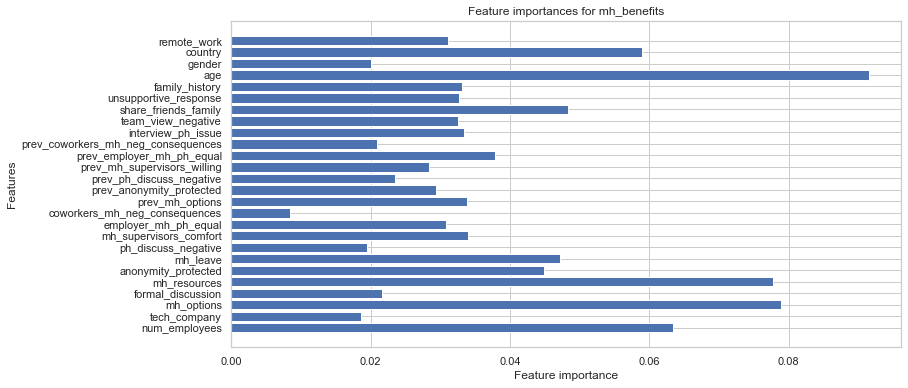

In [161]:
plot_importance_features(features_hash)

In [169]:
def check_correlation_with_target(column_name,dataframe):
    df_correlation = dataframe
    correlations = df_correlation.corr()[column_name].drop(column_name)
    return(correlations)

In [170]:
corr = check_correlation_with_target('mh_benefits',df1)

In [171]:
def plot_correlation(correlation):
    plt.figure(figsize=(12, 6))
    plt.barh(correlations.index, correlations.values)
    plt.xlabel("Correlation")
    plt.ylabel("Features")
    plt.title("Correlation between mh_benefits and other features")
    plt.show()

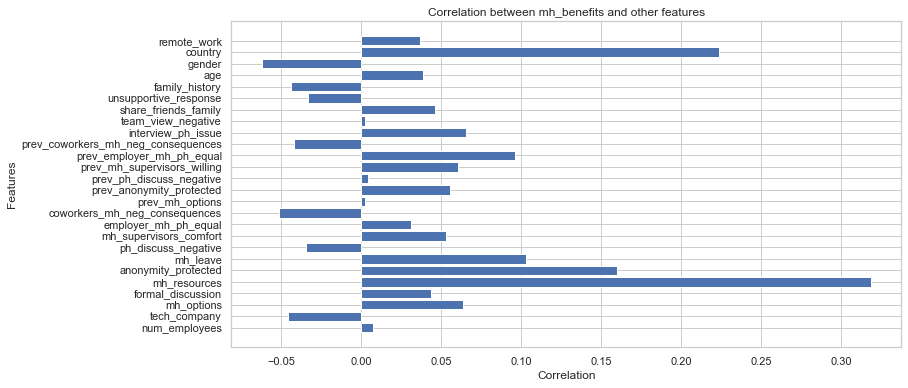

In [172]:
plot_correlation(corr)

In [205]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have loaded your df1set into a df1Frame called 'data'
# data = pd.read_csv('your_data_file.csv')

# Select features for the 'mh_benefits' prediction task
features = ['num_employees', 'country', 'gender', 'age', 'mh_resources', 'mh_options']
target = 'mh_benefits'

# Preprocess categorical features
categorical_features = ['num_employees', 'country', 'gender', 'mh_resources', 'mh_options']
label_encoders = {}

for feature in categorical_features:
    le = LabelEncoder()
    df1[feature] = le.fit_transform(df1[feature])
    label_encoders[feature] = le

# Convert target variable 'mh_benefits' to numerical
df1['mh_benefits'] = df1['mh_benefits'].astype('category').cat.codes

# Split the df1 into training and testing sets
X = df1[features]
y = df1[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# Create and train a logistic regression model
random_clf = RandomForestClassifier(n_estimators=100, random_state=42)
random_clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = random_clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.5882352941176471
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.55      0.55        11
           1       0.68      0.79      0.73        24
           2       0.42      0.31      0.36        16

    accuracy                           0.59        51
   macro avg       0.55      0.55      0.54        51
weighted avg       0.57      0.59      0.57        51

Confusion Matrix:
[[ 6  2  3]
 [ 1 19  4]
 [ 4  7  5]]


In [217]:
def predict_mh_benefits(num_employees, country, gender, age, mh_resources, mh_options):
    # Encode the input features using the same LabelEncoder used during training
    num_employees_encoded = label_encoders['num_employees'].transform([num_employees])
    country_encoded = label_encoders['country'].transform([country])
    gender_encoded = label_encoders['gender'].transform([gender])
    mh_resources_encoded = label_encoders['mh_resources'].transform([mh_resources])
    mh_options_encoded = label_encoders['mh_options'].transform([mh_options])

    # Create a DataFrame with the encoded input features
    input_data = pd.DataFrame({
        'num_employees': num_employees_encoded,
        'country': country_encoded,
        'gender': gender_encoded,
        'age': [age],
        'mh_resources': mh_resources_encoded,
        'mh_options': mh_options_encoded
    })

    # Make a prediction using the trained classifier
    prediction = random_clf.predict(input_data)

    # Decode the predicted value for 'mh_benefits'
    mh_benefits_decoder = {0: 'No', 1: 'Yes', 2: 'Not sure'}
    predicted_mh_benefits = mh_benefits_decoder[prediction[0]]

    return predicted_mh_benefits

In [206]:
predict_mh_benefits(1,0,1,30,0,0)

'No'

In [207]:
predict_mh_benefits(2,1,1,30,1,1)

'Yes'

In [197]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have loaded your df1set into a df1Frame called 'data'
# data = pd.read_csv('your_data_file.csv')

# Select features for the 'mh_benefits' prediction task
features = ['num_employees', 'country', 'gender', 'age', 'mh_resources', 'mh_options']
target = 'mh_benefits'

# Preprocess categorical features
categorical_features = ['num_employees', 'country', 'gender', 'mh_resources', 'mh_options']
label_encoders = {}

for feature in categorical_features:
    le = LabelEncoder()
    df1[feature] = le.fit_transform(df1[feature])
    label_encoders[feature] = le

# Convert target variable 'mh_benefits' to numerical
df1['mh_benefits'] = df1['mh_benefits'].astype('category').cat.codes

# Split the df1 into training and testing sets
X = df1[features]
y = df1[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# Create and train a logistic regression model
logistic_clf = LogisticRegression(random_state=42, multi_class='multinomial', solver='lbfgs')
logistic_clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = logistic_clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6078431372549019
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.55      0.57        11
           1       0.65      0.92      0.76        24
           2       0.43      0.19      0.26        16

    accuracy                           0.61        51
   macro avg       0.56      0.55      0.53        51
weighted avg       0.57      0.61      0.56        51

Confusion Matrix:
[[ 6  3  2]
 [ 0 22  2]
 [ 4  9  3]]


In [198]:
def predict_mh_benefits(num_employees, country, gender, age, mh_resources, mh_options):
    # Encode the input features using the same LabelEncoder used during training
    num_employees_encoded = label_encoders['num_employees'].transform([num_employees])
    country_encoded = label_encoders['country'].transform([country])
    gender_encoded = label_encoders['gender'].transform([gender])
    mh_resources_encoded = label_encoders['mh_resources'].transform([mh_resources])
    mh_options_encoded = label_encoders['mh_options'].transform([mh_options])

    # Create a DataFrame with the encoded input features
    input_data = pd.DataFrame({
        'num_employees': num_employees_encoded,
        'country': country_encoded,
        'gender': gender_encoded,
        'age': [age],
        'mh_resources': mh_resources_encoded,
        'mh_options': mh_options_encoded
    })

    # Make a prediction using the trained classifier
    prediction = logistic_clf.predict(input_data)

    # Decode the predicted value for 'mh_benefits'
    mh_benefits_decoder = {0: 'No', 1: 'Yes', 2: 'Not sure'}
    predicted_mh_benefits = mh_benefits_decoder[prediction[0]]

    return predicted_mh_benefits

In [200]:
predict_mh_benefits(3,0,1,30,1,0)


'No'

In [201]:
predict_mh_benefits(3,1,1,30,1,0)

'Yes'

In [202]:
predict_mh_benefits(2,1,1,30,1,1)

'Yes'

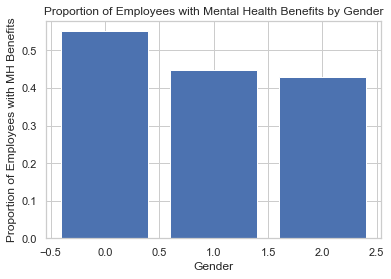

In [211]:
import matplotlib.pyplot as plt

# Calculate the proportion of employees with mental health benefits for each gender
# genders = label_encoders['gender'].classes_
proportions_with_benefits = []
genders = df1['gender']

for gender in genders:
    gender_data = df1[df1['gender'] == label_encoders['gender'].transform([gender])[0]]
    gender_with_benefits = gender_data[gender_data['mh_benefits'] == 1]
    proportion_with_benefits = len(gender_with_benefits) / len(gender_data)
    proportions_with_benefits.append(proportion_with_benefits)

# Create a bar plot to visualize the proportions
plt.bar(genders, proportions_with_benefits)
plt.xlabel('Gender')
plt.ylabel('Proportion of Employees with MH Benefits')
plt.title('Proportion of Employees with Mental Health Benefits by Gender')
plt.show()

In [214]:

features = ['num_employees','mh_benefits', 'tech_company',  'mh_options', 'formal_discussion', 'mh_resources', 'anonymity_protected', 'mh_leave', 'ph_discuss_negative', 'mh_supervisors_comfort',  'coworkers_mh_neg_consequences', 'prev_mh_options', 'prev_anonymity_protected', 'prev_ph_discuss_negative', 'prev_mh_supervisors_willing', 'prev_employer_mh_ph_equal', 'prev_coworkers_mh_neg_consequences', 'interview_ph_issue', 'team_view_negative', 'share_friends_family', 'unsupportive_response', 'family_history', 'age', 'gender', 'country', 'remote_work']
target = 'employer_mh_ph_equal'

features_hash = check_features_important_RandomForest(features, target)

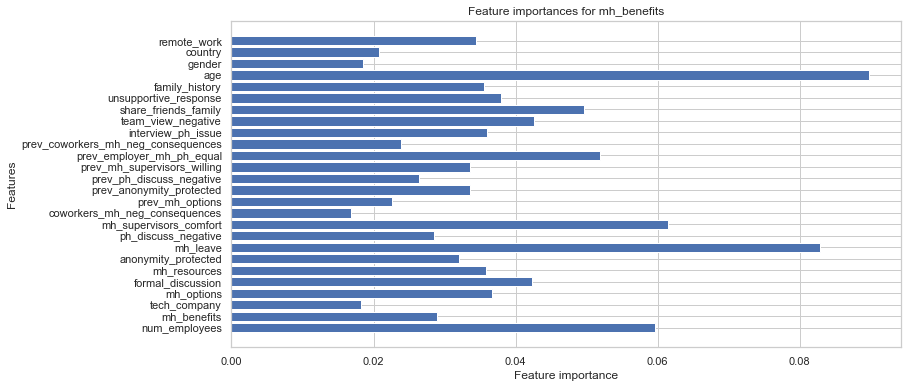

In [215]:
plot_importance_features(features_hash)

In [216]:
corr = check_correlation_with_target('employer_mh_ph_equal',df1)

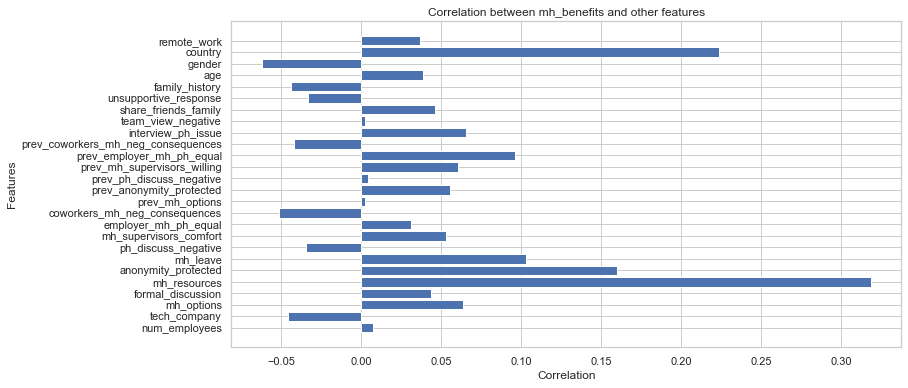

In [218]:
plot_correlation(corr)